<a href="https://colab.research.google.com/github/aemiralfath/BPML-Dicoding/blob/master/chessman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip \
-O /tmp/Chessman-image-dataset.zip

--2020-08-08 03:43:40--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M  24.1MB/s    in 2.4s    

2020-08-08 03:43:43 (24.1 MB/s) - ‘/tmp/Chessman-image-dataset.zip’ saved [60684125/60684125]



In [2]:
import os
import zipfile

local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Queen', 'Bishop', 'King', 'Knight', 'Rook', 'Pawn']

In [4]:
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))
print('total Bishop images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Bishop')))
print('total Rook images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Rook')))
print('total Queen images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Queen')))

total pawn images : 107
total King images : 76
total Knight images : 106
total Bishop images : 87
total Rook images : 102
total Queen images : 78


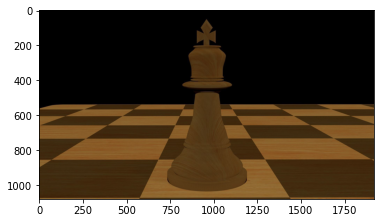

In [5]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [21]:
import tensorflow as tf

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 17, 17, 128)      

In [25]:
from keras.layers import Input
from keras.applications import ResNet50
from keras.applications import ResNet152V2

model = tf.keras.models.Sequential([
                                    ResNet152V2(weights='imagenet', include_top=False, input_tensor=Input(shape=(150, 150, 3))),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(6, activation='softmax')
])
model.layers[0].trainable = False

model.summary()

234553344/234545216 [==============================] - 6s 0us/step
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 5, 5, 2048)        58331648  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 3078      
Total params: 84,549,638
Trainable params: 26,217,990
Non-trainable params: 58,331,648
_________________________________________________________________


In [26]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//8,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.n//16
)

Epoch 1/50
62/62 [==============================] - 17s 272ms/step - loss: 22.1221 - accuracy: 0.3829 - val_loss: 3.6563 - val_accuracy: 0.6667
Epoch 2/50
62/62 [==============================] - 13s 211ms/step - loss: 5.3571 - accuracy: 0.5988 - val_loss: 1.3132 - val_accuracy: 0.6458
Epoch 3/50
62/62 [==============================] - 13s 209ms/step - loss: 1.5536 - accuracy: 0.6578 - val_loss: 0.6843 - val_accuracy: 0.7500
Epoch 4/50
62/62 [==============================] - 13s 208ms/step - loss: 1.1403 - accuracy: 0.6782 - val_loss: 1.1476 - val_accuracy: 0.6458
Epoch 5/50
62/62 [==============================] - 13s 206ms/step - loss: 1.0614 - accuracy: 0.6925 - val_loss: 0.9449 - val_accuracy: 0.7083
Epoch 6/50
62/62 [==============================] - 13s 208ms/step - loss: 1.0787 - accuracy: 0.7189 - val_loss: 0.6787 - val_accuracy: 0.7083
Epoch 7/50
62/62 [==============================] - 13s 209ms/step - loss: 0.9128 - accuracy: 0.7169 - val_loss: 2.0685 - val_accuracy: 0.604

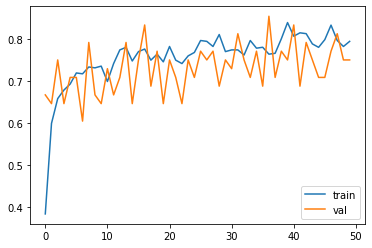

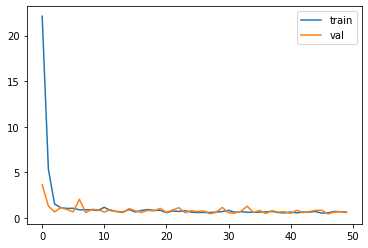

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.figure()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.show()